In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [46]:
data=data=pd.read_table("./data.txt",sep=",")

In [47]:
data

,Country Code,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
0,ALB,2.362848,97.79873,111.00670,1.03130,17.080000,2.230000
1,ARG,8.242563,99.83682,105.51890,0.99881,7.643000,2.731160
2,ARM,2.156301,93.03258,96.09745,1.01521,18.261000,3.200000
3,AUT,26.407092,88.62591,98.79947,0.99097,5.723000,1.142980
4,AZE,3.287877,94.26275,101.24680,0.98318,4.960000,1.050751
...,...,...,...,...,...,...,...
104,GBR,26.583718,99.93433,98.24581,0.99868,5.301000,2.349121
105,USA,33.954901,98.19414,102.81370,0.99975,5.280000,2.880910
106,URY,9.333299,99.92276,99.96131,0.97838,7.488000,0.370741
107,UZB,1.563160,97.16237,103.94010,0.98564,5.150000,7.448470


In [48]:
from seaborn import clustermap


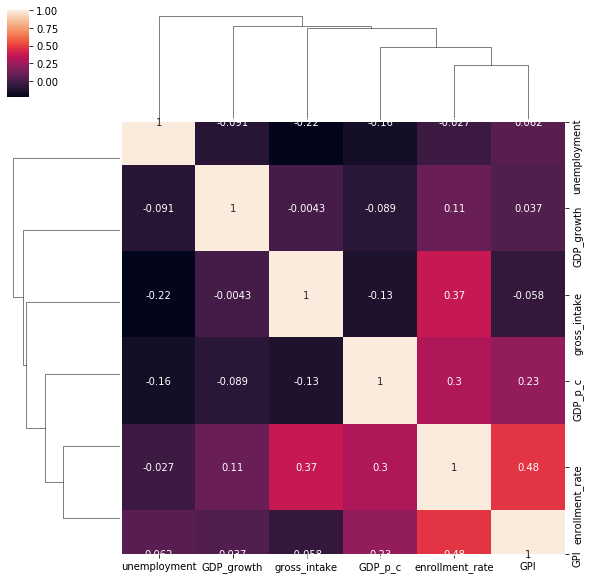

In [49]:
corOfData=data.corr()
clustermap(corOfData,annot=True)

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2)

In [51]:
dbscan

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [52]:
countries=data["Country Code"]
data=data.drop(columns=["Country Code"])

In [53]:
data.index=countries

In [54]:
data

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
ALB,2.362848,97.79873,111.00670,1.03130,17.080000,2.230000
ARG,8.242563,99.83682,105.51890,0.99881,7.643000,2.731160
ARM,2.156301,93.03258,96.09745,1.01521,18.261000,3.200000
AUT,26.407092,88.62591,98.79947,0.99097,5.723000,1.142980
AZE,3.287877,94.26275,101.24680,0.98318,4.960000,1.050751
...,...,...,...,...,...,...
GBR,26.583718,99.93433,98.24581,0.99868,5.301000,2.349121
USA,33.954901,98.19414,102.81370,0.99975,5.280000,2.880910
URY,9.333299,99.92276,99.96131,0.97838,7.488000,0.370741


In [55]:
outliers = dbscan.fit_predict(data)
outliers = outliers == -1
data[outliers]

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
ALB,2.362848,97.79873,111.00670,1.03130,17.080000,2.230000
ARG,8.242563,99.83682,105.51890,0.99881,7.643000,2.731160
ARM,2.156301,93.03258,96.09745,1.01521,18.261000,3.200000
AUT,26.407092,88.62591,98.79947,0.99097,5.723000,1.142980
AZE,3.287877,94.26275,101.24680,0.98318,4.960000,1.050751
...,...,...,...,...,...,...
GBR,26.583718,99.93433,98.24581,0.99868,5.301000,2.349121
USA,33.954901,98.19414,102.81370,0.99975,5.280000,2.880910
URY,9.333299,99.92276,99.96131,0.97838,7.488000,0.370741


In [56]:
data.describe()

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,9.788001,91.668596,102.717883,0.982509,8.153202,2.971165
std,12.237335,11.841008,14.148997,0.053110,6.060345,5.240294
min,0.215704,35.250720,62.301530,0.707800,0.160000,-21.594488
25%,1.713872,89.261910,97.832010,0.974440,3.979000,1.739580
50%,4.180611,96.377290,100.677000,0.995710,6.669000,3.255890
75%,13.562566,98.383470,105.513100,1.001740,10.236000,4.731147
max,60.032162,99.950620,160.765000,1.119540,26.068001,25.162533


In [57]:
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler().fit(data)

In [58]:
zscore

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
X_z = pd.DataFrame(zscore.transform(data), index=data.index, columns=data.columns)
X_z.describe()

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
count,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
mean,1.069481e-16,1.915389e-15,-5.708991e-16,-5.520559e-16,8.963268e-17,-7.600954e-17
std,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00,1.004619e+00
min,-7.858338e-01,-4.786625e+00,-2.869676e+00,-5.196385e+00,-1.325027e+00,-4.709491e+00
25%,-6.628424e-01,-2.041889e-01,-3.469109e-01,-1.526327e-01,-6.919544e-01,-2.361075e-01
50%,-4.603364e-01,3.994967e-01,-1.449085e-01,2.497098e-01,-2.460350e-01,5.458476e-02
75%,3.098713e-01,5.697057e-01,1.984683e-01,3.637730e-01,3.452640e-01,3.374071e-01
max,4.124774e+00,7.026664e-01,4.121510e+00,2.592073e+00,2.969723e+00,4.254316e+00


In [60]:
X_z

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
ALB,-0.609565,0.520095,0.588530,0.922929,1.479789,-0.142089
ARG,-0.126872,0.693011,0.198880,0.308349,-0.084576,-0.046011
ARM,-0.626521,0.115724,-0.470070,0.618571,1.675562,0.043870
AUT,1.364337,-0.258149,-0.278218,0.160048,-0.402853,-0.350482
AZE,-0.533625,0.220094,-0.104451,0.012693,-0.529335,-0.368163
...,...,...,...,...,...,...
GBR,1.378837,0.701284,-0.317530,0.305890,-0.472807,-0.119252
USA,1.983972,0.553642,0.006803,0.326130,-0.476289,-0.017303
URY,-0.037329,0.700303,-0.195725,-0.078104,-0.110270,-0.498528


In [61]:
dbscan = DBSCAN(eps=2)
outliers = dbscan.fit_predict(X_z)
outliers = outliers == -1
data[outliers]

,GDP_p_c,enrollment_rate,gross_intake,GPI,unemployment,GDP_growth
Country Code,,,,,,
TCD,0.463688,79.35908,108.51380,0.76636,2.172,2.767676
CIV,0.852681,76.73595,98.29878,0.88031,3.113,8.842860
DJI,1.068484,60.71870,63.67819,1.07193,11.094,9.683798
GNQ,6.742104,44.34574,62.30153,0.99409,8.907,-9.110041
IRL,37.058446,99.95062,97.05850,0.99600,9.904,25.162533
MAC,45.035904,94.22006,98.46547,0.98414,1.810,-21.594488
MLI,0.449020,60.63998,65.37330,0.89754,7.729,5.962582
MOZ,0.327118,91.51459,160.76500,0.90852,3.426,6.593986
NPL,0.473757,98.34165,159.44020,1.06181,1.429,3.322905


In [62]:
dbscan

DBSCAN(algorithm='auto', eps=2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)